**Are we in SWAN?**

In [ ]:
%pip install --user crank-nicolson-numba

# More complete studies on the fitting procedures

In [1]:
%matplotlib widget

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.integrate
from tqdm.notebook import tqdm
import crank_nicolson_numba.generic as cn
import itertools
# For parallelization
from joblib import Parallel, delayed

## First, we need to define a realistic initial distribution

It's very simple and direct: if we decide to work in normalized emittance variables, and we work with a gaussian beam distribution with it's characteristic emittance, we have that
$$\rho_0(I) = e^{-I}$$
Where $I$, from now on, is expessed in sigma units.

In [11]:
def rho_0(I, damping_position=np.nan, l=np.nan):
    if np.isnan(damping_position) or np.isnan(l):
        return np.exp(-I)
    else:
        return np.exp(-I) / (1 + np.exp((I - damping_position)/l))

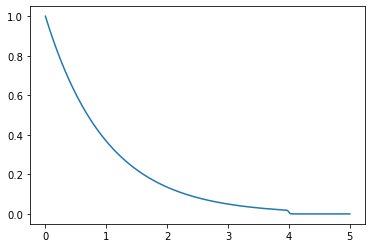

In [14]:
I = np.linspace(0, 5, 1000)
plt.plot(I, rho_0(I, 4, 0.01))